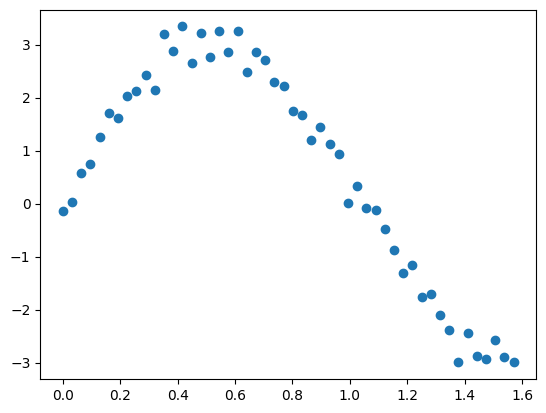

In [4]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 50
x_train = np.linspace(0,np.pi/2,num_samples)
y_train = 3*np.sin(3*x_train) + np.random.normal(loc = 0,scale=0.2,size = num_samples)
plt.figure()
plt.scatter(x_train,y_train)
plt.show()

In [5]:
degree = 5
x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
def polynomial_features(x_train,degree):
    return np.hstack([x_train ** d for d in range(0,degree+1)])
x_train = polynomial_features(x_train,degree)
print(x_train[0:5])

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.20570679e-02 1.02765560e-03 3.29436254e-05
  1.05607604e-06 3.38547012e-08]
 [1.00000000e+00 6.41141358e-02 4.11062241e-03 2.63549003e-04
  1.68972166e-05 1.08335044e-06]
 [1.00000000e+00 9.61712037e-02 9.24890042e-03 8.89477886e-04
  8.55421589e-05 8.22669239e-06]
 [1.00000000e+00 1.28228272e-01 1.64424896e-02 2.10839203e-03
  2.70355465e-04 3.46672140e-05]]


[ 0.82095445  5.50477143 -1.23989356 -4.03907574 -2.98522284  2.56438675]


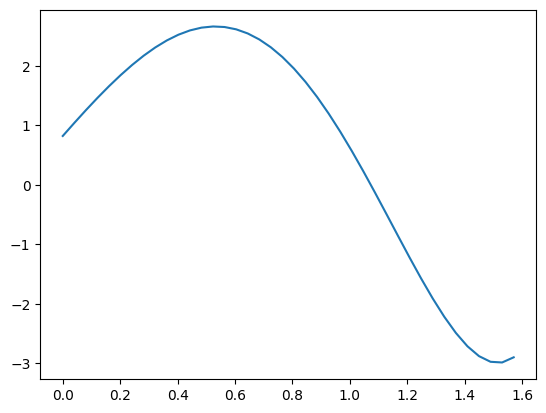

In [6]:
def gradient_descent(x_train,y_train,iterations):
    w = np.zeros(x_train.shape[1])
    alpha = 0.0002
    for i in range(iterations):
        grad = -1 * (x_train.T @ (y_train - x_train @ w))/x_train.shape[0]
        w = w - alpha * grad
    return w
w = (gradient_descent(x_train,y_train,1000000))
print(w)
x_test = np.linspace(0,np.pi/2,40).reshape(-1,1)
x_test = polynomial_features(x_test,degree)
y_pred = x_test @ w
plt.figure()
plt.plot(x_test[:,1],y_pred)

In [9]:
def gradient_descent_ridge(x_train,y_train,iterations):
    w = np.zeros(x_train.shape[1])
    alpha = 0.002
    lam = 0.1
    for i in range(iterations):
        grad = -1 * (x_train.T @ (y_train - x_train @ w)) / x_train.shape[0] + lam*w
        w = w - alpha * grad
    return w
w = (gradient_descent_ridge(x_train,y_train,1000000))
print(w)
x_test = np.linspace(0,np.pi/2,40).reshape(-1,1)
x_test = polynomial_features(x_test,degree)
y_pred = x_test @ w
plt.figure()
plt.plot(x_test[:,1],y_pred)

KeyboardInterrupt: 

0.04977669409304394 0.9880515018793962


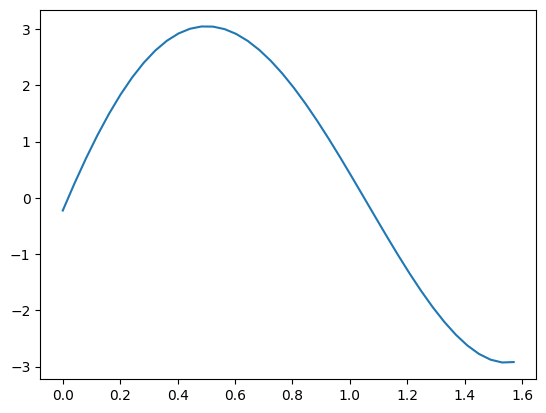

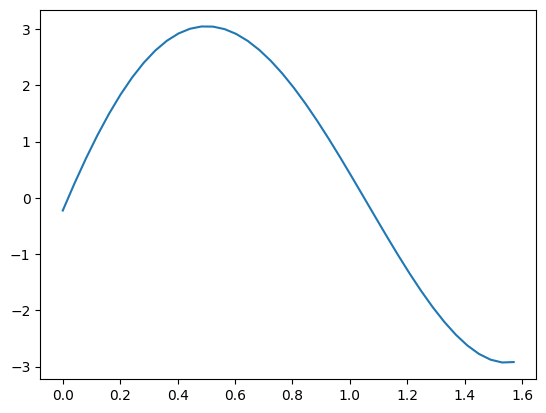

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_test = 3*np.sin(3*x_test[:,1]) + np.random.normal(loc = 0,scale=0.2,size = 40)
plt.figure()
plt.plot(x_test[:,1],y_pred)

mse = mean_squared_error(y_pred = y_pred,y_true=y_test)
r2 = r2_score(y_test,y_pred)
print(mse,r2)

model = Pipeline([
    ("scalar",StandardScaler()),
    ("ridge",Ridge(alpha=0))
])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test = 3*np.sin(3*x_test[:,1]) + np.random.normal(loc = 0,scale=0.2,size = 40)
plt.figure()
plt.plot(x_test[:,1],y_pred)

In [58]:
from sklearn.model_selection import train_test_split
num_samples = 2000
d1 = np.random.multivariate_normal([1,1],[[0.9,-0.4],[-0.4,0.7]],num_samples//2)
d2 = np.random.multivariate_normal([-1,-1],[[0.9,0.4],[0.4,0.7]],num_samples//2)
d1 = np.hstack((d1,np.ones(num_samples//2).reshape(-1,1)))
d2 = np.hstack((d2,np.zeros(num_samples//2).reshape(-1,1)))
data = np.vstack((d1,d2))
label = np.vstack((np.ones(num_samples//2).reshape(-1,1),np.zeros(num_samples//2).reshape(-1,1)))
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.1,random_state=42)
print(y_train.shape)

(1800, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

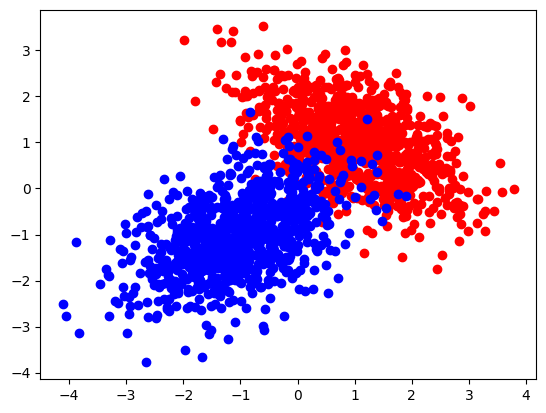

In [59]:
plt.figure()
plt.scatter(x_train[y_train.reshape(-1) == 1][:,0],x_train[y_train.reshape(-1) == 1][:,1],c = 'r')
plt.scatter(x_train[y_train.reshape(-1) == 0][:,0],x_train[y_train.reshape(-1) == 0][:,1],c = 'b')
plt.show

1.0


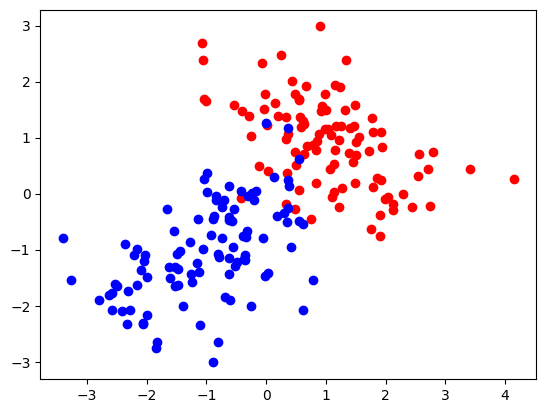

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
model = Pipeline([
    ("scalar",StandardScaler()),
    ("classifier",LogisticRegression())
])
#normzation of data in linear/logistic regresion
model.fit(x_train,y_train.reshape(-1))
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
plt.scatter(x_test[y_pred.reshape(-1) == 1][:,0],x_test[y_pred.reshape(-1) == 1][:,1],c = 'r')
plt.scatter(x_test[y_pred.reshape(-1) == 0][:,0],x_test[y_pred.reshape(-1) == 0][:,1],c = 'b')